In [1]:
import matplotlib.pyplot as plt

# Performance Measures


In [2]:
import numpy as np

X=np.load("../TrainTestDataFlat/Shuffled/X.npy")
y=np.load("../TrainTestDataFlat/Shuffled/y.npy")
X_train=np.load("../TrainTestDataFlat/Shuffled/X_train.npy")
y_train=np.load("../TrainTestDataFlat/Shuffled/y_train.npy")
X_test=np.load("../TrainTestDataFlat/Shuffled/X_test.npy")
y_test=np.load("../TrainTestDataFlat/Shuffled/y_test.npy")

In [3]:
intention = ["Backward", "Forward", "Left", "Other", "Right"]

## K-Nearest Neighbour

In [4]:
# import pickle
from joblib import load

knn_clf = load('../ModelsTemp/KNNModel.joblib')


In [5]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn_clf, X_test, y_test, cv=3, scoring='accuracy')

array([0.45, 0.58, 0.56])

In [8]:
# Confusion Matrix
from sklearn.model_selection import cross_val_predict

Y_test_pred = cross_val_predict(knn_clf, X_test, y_test, cv=3)

In [9]:
from sklearn.metrics import confusion_matrix

knn_conf_mx = confusion_matrix(y_test, Y_test_pred)

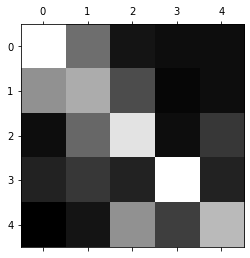

In [14]:
row_sums = knn_conf_mx.sum(axis=1, keepdims=True)
knn_norm_conf_mx = knn_conf_mx / row_sums

plt.matshow(knn_conf_mx, cmap=plt.cm.gray)
plt.show()

Let's normalize the confusion matrix to show the common mistakes made by the model. 

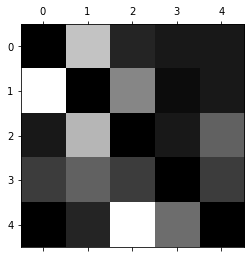

In [17]:
row_sums = knn_conf_mx.sum(axis=1, keepdims=True)
knn_norm_conf_mx = knn_conf_mx / row_sums

np.fill_diagonal(knn_norm_conf_mx, 0)
plt.matshow(knn_norm_conf_mx, cmap=plt.cm.gray)
plt.show()

### Confusion Matrix

A better plot will make it more readable, and more visually appealing. Let's use seaborn and take it from the top. 
Confusion Matrix, then Normalized Confusion Matrix (for the common mistakes/misclassifications). 

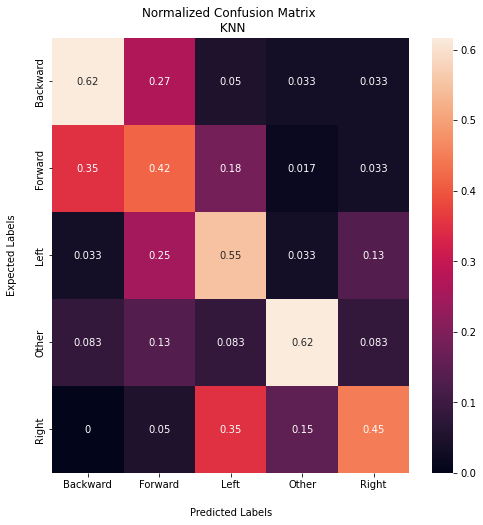

In [16]:
# Confusion Matrix in Color!
import pandas as pd
import seaborn as sns

knn_df_cm = pd.DataFrame(knn_norm_conf_mx, index=intention, columns=intention)
plt.figure(figsize=(8,8))
plt.title('Normalized Confusion Matrix \n KNN')
sns.heatmap(knn_df_cm, annot=True)
plt.xlabel("Predicted Labels", labelpad=18)
plt.ylabel("Expected Labels",labelpad=18 )
plt.show()

### Normalized Confusion Matrix
Focusing on errors, analyzing the types of errrors it makes can help with improving the model.

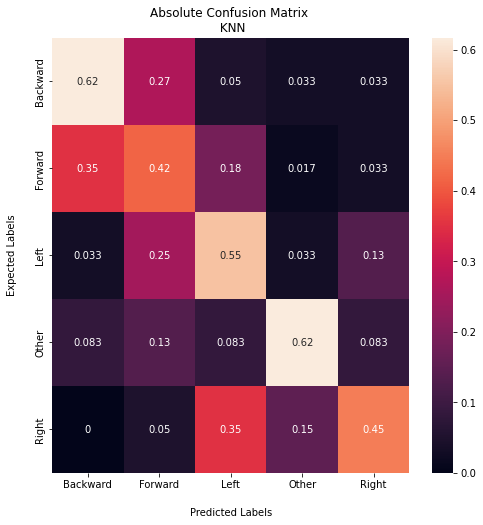

In [13]:


# Normalized Confusion Matrix in Color!
knn_df_norm_cm = pd.DataFrame(knn_norm_conf_mx, index=intention, columns=intention)
plt.figure(figsize=(8,8))
plt.title('Absolute Confusion Matrix \n KNN')
sns.heatmap(knn_df_norm_cm, annot=True)
plt.xlabel("Predicted Labels", labelpad=18)
plt.ylabel("Expected Labels",labelpad=18 )
plt.show()

From the normalized confusion matrix, notice the model commonly mistakes Right for Left & Forward for Backward. Those are the worst mistakes, but there are also significant instances of mistaking Left for Right and Other for Right as well as Backward for Forward (tho not as badly as the case in reverse). 

### Classification Report

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision Score:\t" + str(precision_score(y_train, y_train_pred, average='macro')))
print("Recall Score:\t\t" + str(recall_score(y_train, y_train_pred, average='macro')))
print("F1_Score:\t\t" + str(f1_score(y_train, y_train_pred, average='macro')))
# This assumes that all labels are equally important. Which they are, except maybe 'Other'.

Precision Score:	0.7290363788164609
Recall Score:		0.7266666666666667
F1_Score:		0.7266183521677434


In [ ]:
# Better yet, leverage 'classification report' from sklearn! 
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred, target_names=intention))

              precision    recall  f1-score   support

    Backward       0.71      0.77      0.74        90
     Forward       0.72      0.66      0.69        90
        Left       0.65      0.73      0.69        90
       Other       0.86      0.83      0.85        90
       Right       0.70      0.64      0.67        90

    accuracy                           0.73       450
   macro avg       0.73      0.73      0.73       450
weighted avg       0.73      0.73      0.73       450



## Random Forest

In [ ]:
rf_clf = load('../ModelsTemp/RFModel.joblib')

y_train_pred = cross_val_predict(rf_clf, X_train, y_train, cv=3)


### Confusion Matrix

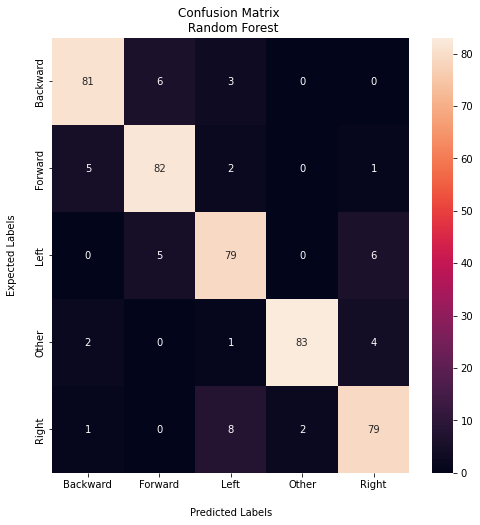

In [ ]:
rf_conf_mx = confusion_matrix(y_train, y_train_pred)

rf_df_cm = pd.DataFrame(rf_conf_mx, index=intention, columns=intention)
plt.figure(figsize=(8,8))
plt.title('Confusion Matrix \n Random Forest')
sns.heatmap(rf_df_cm, annot=True)
plt.xlabel("Predicted Labels", labelpad=18)
plt.ylabel("Expected Labels",labelpad=18 )
plt.show()


### Normalized Confusion Matrix

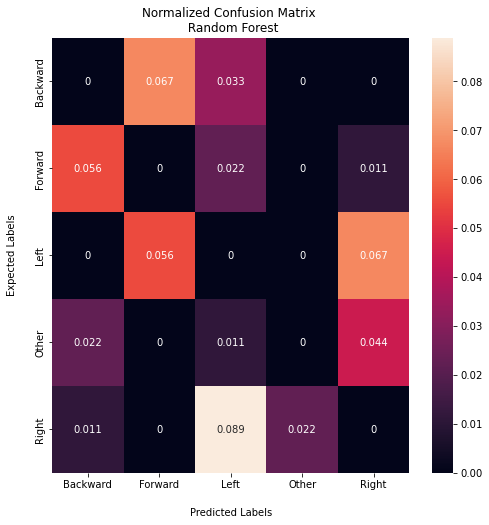

In [ ]:
row_sums = rf_conf_mx.sum(axis=1, keepdims=True)
rf_norm_conf_mx = rf_conf_mx / row_sums
np.fill_diagonal(rf_norm_conf_mx, 0)
rf_df_norm_cm = pd.DataFrame(rf_norm_conf_mx, index=intention, columns=intention)
plt.figure(figsize=(8,8))
plt.title('Normalized Confusion Matrix \n Random Forest')
sns.heatmap(rf_df_norm_cm, annot=True)
plt.xlabel("Predicted Labels", labelpad=18)
plt.ylabel("Expected Labels",labelpad=18 )
plt.show()

This normalized confusion matrix is showing that the model makes the most mistakes classifying RIGHT as LEFT. The values are not too significant. However, it does confirm the mistakes the model makes in live classifications of directional intentions. 

### Classification Report

In [ ]:
print(classification_report(y_train, y_train_pred, target_names=intention))

              precision    recall  f1-score   support

    Backward       0.91      0.90      0.91        90
     Forward       0.88      0.91      0.90        90
        Left       0.85      0.88      0.86        90
       Other       0.98      0.92      0.95        90
       Right       0.88      0.88      0.88        90

    accuracy                           0.90       450
   macro avg       0.90      0.90      0.90       450
weighted avg       0.90      0.90      0.90       450



## Support Vector Machine

In [ ]:
svm_clf = load('../ModelsTemp/SVMModel.joblib')

y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3)

### Confusion Matrix

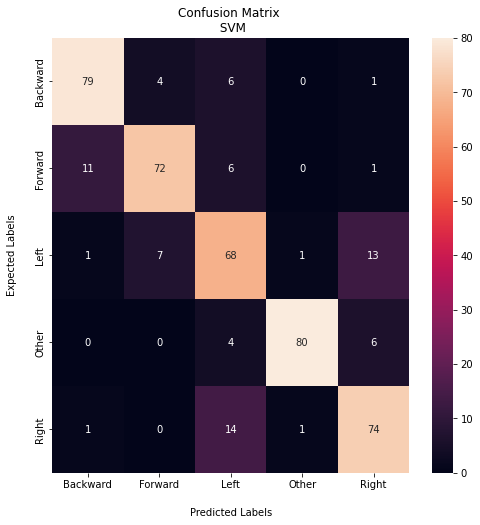

In [ ]:
svm_conf_mx = confusion_matrix(y_train, y_train_pred)

svm_df_cm = pd.DataFrame(svm_conf_mx, index=intention, columns=intention)
plt.figure(figsize=(8,8))
plt.title('Confusion Matrix \n SVM')
sns.heatmap(svm_df_cm, annot=True)
plt.xlabel("Predicted Labels", labelpad=18)
plt.ylabel("Expected Labels",labelpad=18 )
plt.show()

### Normalized Confusion Matrix

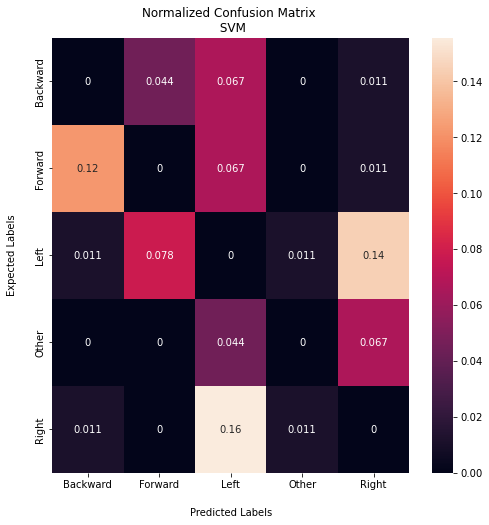

In [ ]:
row_sums = svm_conf_mx.sum(axis=1, keepdims=True)
svm_norm_conf_mx = svm_conf_mx / row_sums
np.fill_diagonal(svm_norm_conf_mx, 0)

svm_df_norm_cm = pd.DataFrame(svm_norm_conf_mx, index=intention, columns=intention)
plt.figure(figsize=(8,8))
plt.title('Normalized Confusion Matrix \n SVM')
sns.heatmap(svm_df_norm_cm, annot=True)
plt.xlabel("Predicted Labels", labelpad=18)
plt.ylabel("Expected Labels",labelpad=18 )
plt.show()

This plot shows that RIGHT is mistaken for LEFT, LEFT for RIGHT and FORWARD for BACKWARD. 

### Classification Report

In [ ]:
print(classification_report(y_train, y_train_pred, target_names=intention))

              precision    recall  f1-score   support

    Backward       0.86      0.88      0.87        90
     Forward       0.87      0.80      0.83        90
        Left       0.69      0.76      0.72        90
       Other       0.98      0.89      0.93        90
       Right       0.78      0.82      0.80        90

    accuracy                           0.83       450
   macro avg       0.83      0.83      0.83       450
weighted avg       0.83      0.83      0.83       450



## Extreme Gradient Boost

In [ ]:
# xgb_clf = load('../ModelsTemp/xgbModel.joblib')

# y_train_pred = cross_val_predict(xgb_clf, X_train, y_train, cv=3)

### Confusion Matrix

In [ ]:
# xgb_conf_mx = confusion_matrix(y_train, y_train_pred)

# xgb_df_cm = pd.DataFrame(xgb_conf_mx, index=intention, columns=intention)
# plt.figure(figsize=(8,8))
# plt.title('Confusion Matrix \n XGB')
# sns.heatmap(xgb_df_cm, annot=True)
# plt.xlabel("Predicted Labels", labelpad=18)
# plt.ylabel("Expected Labels",labelpad=18 )
# plt.show()

Normalized Confusion Matrix

### Classification Report

## Convolutional Neural Network

In [ ]:
# import numpy as np

# X=np.load("../TrainTestDataFlat/Shuffled/X.npy")
# y=np.load("../TrainTestDataFlat/Shuffled/y.npy")
# X_train=np.load("../TrainTestDataFlat/Shuffled/X_train.npy")
# y_train=np.load("../TrainTestDataFlat/Shuffled/y_train.npy")
# X_test=np.load("../TrainTestDataFlat/Shuffled/X_test.npy")
# y_test=np.load("../TrainTestDataFlat/Shuffled/y_test.npy")

# X=np.array(X)
# y=np.array(y)

# X_train=np.array(X_train)
# y_train=np.array(y_train)
# X_test=np.array(X_test)
# y_test=np.array(y_test)

In [ ]:
# from keras.models import load_model

# convnet_clf = load_model('../ModelsTemp/NewRelu80.h5')

In [ ]:
# y_train_pred = convnet_clf.predict(X_train)

NameError: name 'X_train' is not defined

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conv_conf_mx = confusion_matrix(y_train, y_train_pred)

convnet_df_cm = pd.DataFrame(conv_conf_mx, index=intention, columns=intention)
plt.figure(figsize=(8,8))
plt.title('Confusion Matrix \n Conv. Net')
sns.heatmap(convnet_df_cm, annot=True)
plt.xlabel("Predicted Labels", labelpad=18)
plt.ylabel("Expected Labels",labelpad=18 )
plt.show()

NameError: name 'y_train' is not defined

### Normalized Confusion Matrix

In [ ]:
row_sums = convnet_conf_mx.sum(axis=1, keepdims=True)
convnet_norm_conf_mx = convnet_conf_mx / row_sums
np.fill_diagonal(convnet_norm_conf_mx, 0)

convnet_df_norm_conf_mx = pd.DataFrame(convnet_norm_conf_mx, index=intention, columns=intention)
plt.figure(figsize=(8,8))
plt.title('Normalized Confusion Matrix \n Conv. Net')
sns.heatmap(convnet_df_norm_conf_mx, annot=True)
plt.xlabel("Predicted Labels", labelpad=18)
plt.ylabel("Expected Labels",labelpad=18 )
plt.show()

### Classification Report

## Gaussian Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Make predictions on the training set
y_train_pred = cross_val_predict(gnb_clf, X_train, y_train, cv=3)

### Confusion Matrix

In [18]:
gnb_conf_mx = confusion_matrix(y_train, y_train_pred)

gnb_df_cm = pd.DataFrame(gnb_conf_mx, index=intention, columns=intention)
plt.figure(figsize=(8,8))
plt.title('Confusion Matrix \n Gaussian Naive Bayes')
sns.heatmap(gnb_conf_mx, annot=True)
plt.xlabel("Predicted Labels", labelpad=18)
plt.ylabel("Expected Labels",labelpad=18 )
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [450, 300]

### Normalized Confusion Matrix

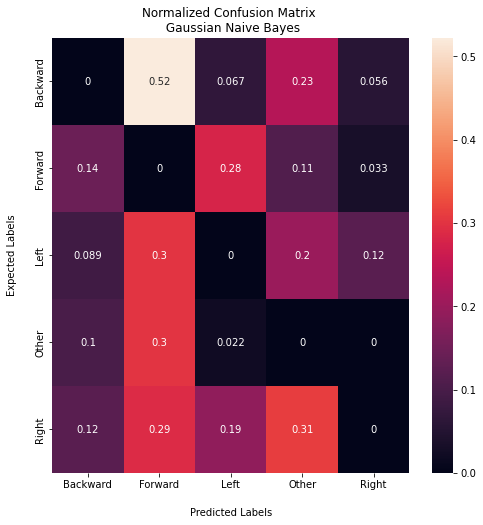

In [ ]:
row_sums = gnb_conf_mx.sum(axis=1, keepdims=True)
gnb_norm_conf_mx = gnb_conf_mx / row_sums
np.fill_diagonal(gnb_norm_conf_mx, 0)

gnb_norm_conf_mx = pd.DataFrame(gnb_norm_conf_mx, index=intention, columns=intention)
plt.figure(figsize=(8,8))
plt.title('Normalized Confusion Matrix \n Gaussian Naive Bayes')
sns.heatmap(gnb_norm_conf_mx, annot=True)
plt.xlabel("Predicted Labels", labelpad=18)
plt.ylabel("Expected Labels",labelpad=18 )
plt.show()

### Classification Report

In [ ]:
print(classification_report(y_train, y_train_pred, target_names=intention))

              precision    recall  f1-score   support

    Backward       0.21      0.12      0.15        90
     Forward       0.23      0.43      0.30        90
        Left       0.34      0.29      0.31        90
       Other       0.40      0.58      0.47        90
       Right       0.30      0.09      0.14        90

    accuracy                           0.30       450
   macro avg       0.30      0.30      0.28       450
weighted avg       0.30      0.30      0.28       450

